## 1) Data Visualization
a) Load the database (Customers_practice.csv).
b) Print the 10 first rows (with head function) of the dataset. Determine the size of the
examples and the number of features of the problem.
c) Display a scatter plot of the data. You should obtain the following expected result :
## 2) K-means algorithm
Sklearn documentation available here : https://scikit- learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
a) Test the kmeans algorithm with k=3, with random_state=0. Use the fit() function on your dataset. Because there is no target column, you can use all of the Data to train your model.
  1
 MSc AIBT : Machine Learning with Python
b) Once the model is trained, you can access to the labels assigned to Data by kmeans using labels_ attribute (look for the documentation to see an example of usage). Display the distinct classes assigned by kmeans (use np.unique())
c) You can access to the centroids of the clusters using the cluster_centers_ attribute (look for the documentation to see an example of usage). Print them.
d) Plot the scatter plot using the labels assigned by kmeans algorithm. This time plot the points according to the label. You should obtain the following plot :
 e) Explain why k=3 seems not appropriate for the correct number of clusters.
f) Find a way to plot the centroids on the plot. Be practical and create a function to plot
everything.
## 3) Find the optimal value of k
Find in the documentation the attribute allowing you to recover the ssd value of the trained kmeans model.
a) Using the whole base, write a script for :
Finding the optimal value of k using the elbow method (use the following range : [1,16]

 MSc AIBT : Machine Learning with Python
- Use the following parameters in Kmeans initialization : random_state = 42 and init=’k- means++’.
- Draw the elbow method plot (you should obtain the following plot)
- Conclude on the best value of k.
b) Train a k-means model with the best value of k obtained before :
- random_state=42 and init=’k-means++’
- Draw the scatterplot associated
- Observe and describe the obtained clusters according to the axis (e.g. cluster 1 contains the customers having low income but a high number of transactions)
## 5) More
Load the test samples (Customers_practice_test.csv).
a) Use your trained kmeans on optimal value of k (found in part 4) to predict the test samples just loaded.
b) Print the predictions
c) Plot the decision boundaries (here is an example with k=3)

## 1) Data Visualization

In [33]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

a) Load the database (Customers_practice.csv).

In [2]:
df = pd.read_csv("Customers_practice.csv")

b) Print the 10 first rows (with head function) of the dataset. Determine the size of the
examples and the number of features of the problem.

In [3]:
print(df)
type(df)
df.head(10)
df.info()

     Annual_Income_(k$)  Spending_Score
0                   103              85
1                    60              52
2                    59              55
3                    62              55
4                    48              47
..                  ...             ...
165                  19              72
166                  87              63
167                  16              77
168                  99              39
169                  50              49

[170 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Annual_Income_(k$)  170 non-null    int64
 1   Spending_Score      170 non-null    int64
dtypes: int64(2)
memory usage: 2.8 KB


c) Display a scatter plot of the data. You should obtain the following expected result :

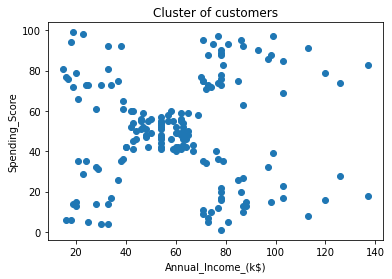

In [4]:
plt.scatter(data = df, x = 'Annual_Income_(k$)', y = 'Spending_Score')
plt.title('Cluster of customers')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

## 2) K-means algorithm

a) Test the kmeans algorithm with k=3, with random_state=0. Use the fit() function on your dataset. Because there is no target column, you can use all of the Data to train your model.

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

b) Once the model is trained, you can access to the labels assigned to Data by kmeans using labels_ attribute (look for the documentation to see an example of usage). Display the distinct classes assigned by kmeans (use np.unique())

In [6]:
kmeans.labels_

array([2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2,
       0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1,
       1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0,
       1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1], dtype=int32)

In [7]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

c) You can access to the centroids of the clusters using the cluster_centers_ attribute (look for the documentation to see an example of usage). Print them.

In [8]:
centroids = kmeans.cluster_centers_

In [9]:
colors = ["green","red","blue","yellow", "purple"]

d) Plot the scatter plot using the labels assigned by kmeans algorithm. This time plot the points according to the label. You should obtain the following plot :

In [10]:
def plotwc(dataframe, X, Y):
    sns.scatterplot(x=dataframe[X], y=dataframe[Y], hue= kmeans.labels_, palette = "viridis")
    plt.legend()
    plt.show()

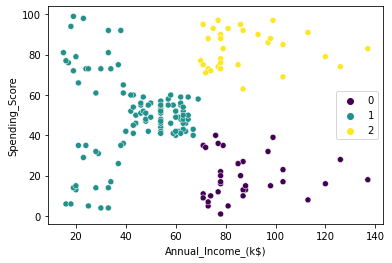

In [11]:
plotwc(df, "Annual_Income_(k$)", "Spending_Score")

e) Explain why k=3 seems not appropriate for the correct number of clusters.

The data is really dispersed and it seems that it need more clusters. it can be proved finding the number of clusters needed with functions.

f) Find a way to plot the centroids on the plot. Be practical and create a function to plot
everything.

In [12]:
def pcentroids(a):
    plt.scatter(a[:, 0], a[:, 1], alpha = 0.5,  marker = "x", s=150, 
    linewidths = 5, zorder = 10, c='red')

In [13]:
def plotevery(dataframe, X, Y, function_with_defined_fcentroids):
    sns.scatterplot(x=dataframe[X], y=dataframe[Y], hue= kmeans.labels_, palette = "viridis")
    function_with_defined_fcentroids(centroids)
    plt.legend()
    plt.show()

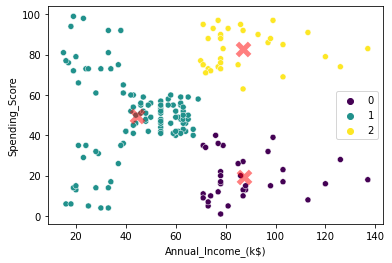

In [14]:
plotevery(df, "Annual_Income_(k$)", "Spending_Score", pcentroids)

## 3) Find the optimal value of k

Find in the documentation the attribute allowing you to recover the ssd value of the trained kmeans model.
a) Using the whole base, write a script for :
- Finding the optimal value of k using the elbow method (use the following range : [1,16[ ).

- Use the following parameters in Kmeans initialization : random_state = 42 and init=’k- means++’.
- Draw the elbow method plot (you should obtain the following plot)
- Conclude on the best value of k.

### There are two ways of doing it

First way

In [15]:
kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(df)

In [16]:
score = []

for cluster in range(1,16):
    kmeans = KMeans(n_clusters=cluster, random_state=0, init='k-means++').fit(df)
    score.append(kmeans.inertia_)

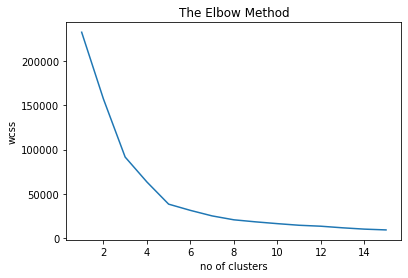

In [17]:
plt.plot(range(1,16), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

Second Way

In [18]:
score = []

for cluster in range(1,16):
    kmeans = KMeans(n_clusters=cluster, random_state=0, init='k-means++').fit(df)
    score.append(kmeans.inertia_)

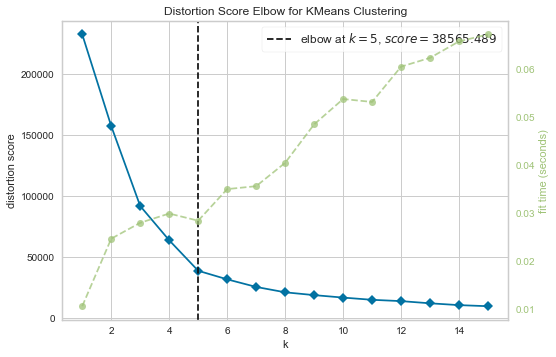

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
kmeans = KMeans(n_clusters=cluster, random_state=0, init='k-means++').fit(df)
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(kmeans, k=(1,16))

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

b) Train a k-means model with the best value of k obtained before :
- random_state=42 and init=’k-means++’
- Draw the scatterplot associated
- Observe and describe the obtained clusters according to the axis (e.g. cluster 1 contains the customers having low income but a high number of transactions)


In [20]:
kmeans = KMeans(n_clusters=5, random_state=0, init='k-means++').fit(df)

In [21]:
centroids = kmeans.cluster_centers_

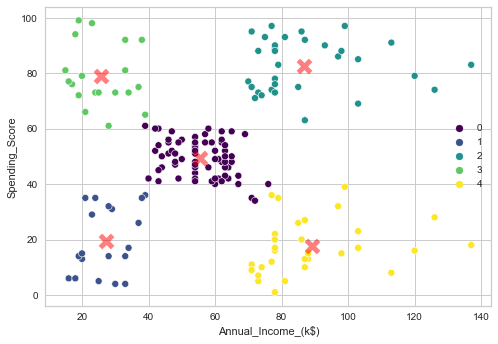

In [22]:
plotevery(df, "Annual_Income_(k$)", "Spending_Score", pcentroids)

cluster 0 contains the customers having income >35,<80 but spending score >35,<63
cluster 1 contains the customers having income >10,<40 but spending score >0,<40
cluster 2 contains the customers having income >60,<140 but spending score >60,<100
cluster 3 contains the customers having income >0,<40 but spending score >60,<100
cluster 4 contains the customers having income >63,<140 but spending score >0,<42

## 5) More

Load the test samples (Customers_practice_test.csv).
a) Use your trained kmeans on optimal value of k (found in part 4) to predict the test samples just loaded.

In [23]:
df_test = pd.read_csv("Customers_practice_test.csv")
print(df_test)
type(df_test)
df_test.head(10)

    Annual_Income_(k$)  Spending_Score
0                   62              42
1                   19               3
2                   48              50
3                   87              75
4                   88              69
5                   67              57
6                   20              77
7                   29              87
8                   69              91
9                  101              68
10                  48              59
11                  46              46
12                  28              82
13                  67              56
14                  65              43
15                  76              87
16                 101              24
17                  17              40
18                  60              50
19                  70              29
20                  39              28
21                  60              47
22                  88              86
23                  78               1
24                  93   

,Annual_Income_(k$),Spending_Score
0,62,42
1,19,3
2,48,50
3,87,75
4,88,69
5,67,57
6,20,77
7,29,87
8,69,91
9,101,68


In [29]:
X_customers = df_test.values

In [24]:
kmeans = KMeans(n_clusters=5, random_state=0, init='k-means++').fit(df_test)

b) Print the predictions

In [25]:
predictions_test = kmeans.predict(df_test)
print(predictions_test)

[3 1 3 2 2 3 0 0 2 2 3 3 0 3 3 2 4 1 3 4 1 3 2 4 4 3 3 1 4 3]


c) Plot the decision boundaries (here is an example with k=3)

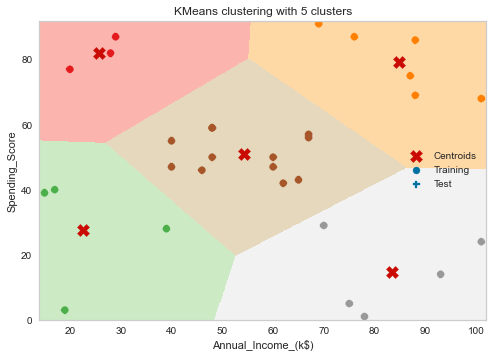

In [26]:
clust = kmeans.labels_
centers = kmeans.cluster_centers_

test_array = np.array(df_test)

#define mesh limits
X = np.array(df_test)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#define mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

#use the kmeANS to predict on the mesh points
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#initiate figure
plt.figure()

#color the mesh acording to the prediction
plt.pcolormesh(xx, yy, Z, cmap="Pastel1", shading = "auto")

#plot centroids
plt.scatter(x = centers[:,0], y = centers[:,1], s=150 ,marker="X",color='r',label="Centroids")

#plot training points
plt.scatter(X[:, 0], X[:, 1], c=clust, cmap="Set1", label = "Training")

#plot test points
plt.scatter(test_array[:, 0], test_array[:, 1], c=predictions_test, cmap="Set1", marker = "P", label = "Test")


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(df_test.columns[0])
plt.ylabel(df_test.columns[1])
plt.title("KMeans clustering with 5 clusters")
plt.legend()
plt.show()

In [31]:
def plot_decision_boundaries_works(clf, X, y, axis1=0,axis2=1, space=0.02, threshold=0.1):
    '''
    Parameters
    ----------
    clf is a pre-trained model
        it is supposed to have the predict function implemented
    
    Returns
    -------
    : None,
        Plots the decision boundaries of a pre-trained model.
        Example of usage : plot_decision_boundaries(knn1, X, y, axis1=0, axis2=1) if your pre-trained model
            is called knn1, your dataset is called X (only features), target is called y, and you want to focus
            only on axis 1 and axis 2
    '''
    x_min,  x_max  =  X[:,  axis1].min()-threshold,  X[:,  axis1].max()+threshold
    y_min,  y_max  =  X[:,  axis2].min()-threshold,  X[:,  axis2].max()+threshold
    xx,  yy  =  np.meshgrid(np.arange(x_min,  x_max,  space), np.arange(y_min,  y_max,  space))
    Y  =  np.array(clf.predict(np.c_[xx.ravel(),  yy.ravel()]))
    Y  =  Y.reshape(xx.shape)
    
    
    colors_2 = ('#FFFB00', '#C7C7C7', '#00AEFF', '#2EFF00', '#FF0000', '#E000FF' , '#FFA600')
    # Create the colormap
    cm2 = ListedColormap(colors_2[0:1+len(np.unique(y))])
    colors_3 = [colors_2[i] for i in range(len(np.unique(y))-1)]
    colors_3.append(colors_2[len(np.unique(y))])
    cm3 = ListedColormap(colors_3)
    contour = plt.contour(xx, yy, Y)
    plt.contourf(xx,  yy,  Y,  alpha=0.8, cmap=cm2)# cmap=plt.cm.RdYlBu)
    
    for i in np.unique(y):
        mask = y == i
        plt.scatter(X[:, axis1][mask], X[:, axis2][mask], c=cm3(i), label=i, edgecolors='k', alpha=0.8)
 
    plt.xlabel('Axis : {}'.format(axis1))
    plt.ylabel('Axis : {}'.format(axis2))
 
    plt.legend()
    plt.xlim(xx.min()-1,  xx.max()+1)
    plt.ylim(yy.min()-1,  yy.max()+1)
    plt.show()



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

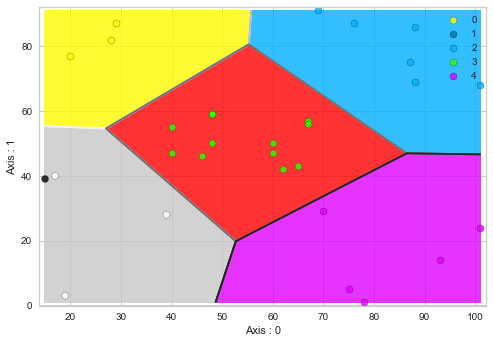

In [34]:
plot_decision_boundaries_works(kmeans, X_customers, predictions_test)